In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

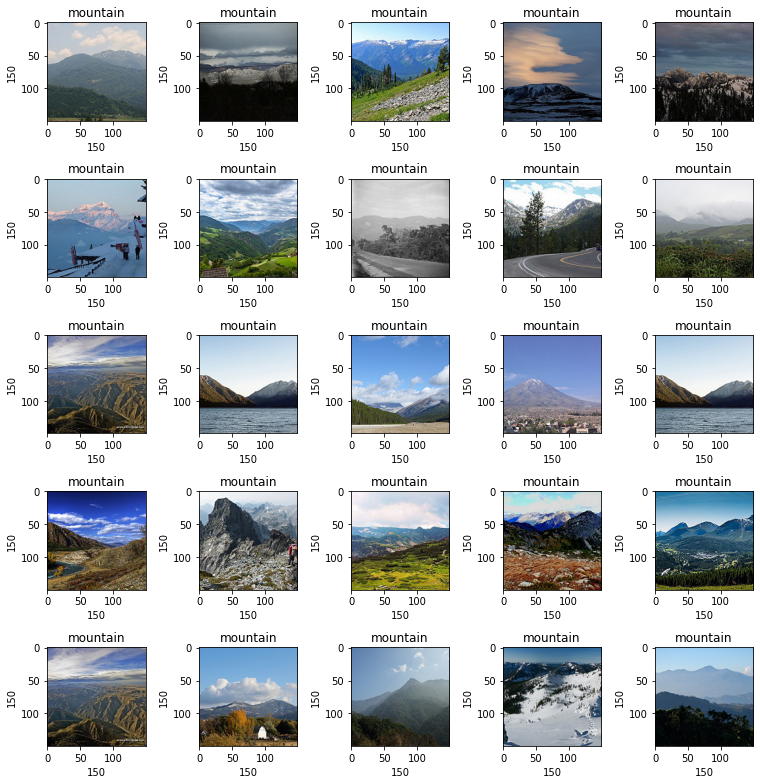

In [3]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = '/content/drive/MyDrive/Colab Notebooks/Intel Image Dataset/mountain'
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [4]:
# Setting root directory
dir = '/content/drive/MyDrive/Colab Notebooks/Intel Image Dataset'
root_dir = listdir(dir)
image_list, label_list = [], []

In [5]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [6]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

In [7]:
# Checking count of class
num_clasess = len(label_counts)
num_clasess

6

In [8]:
# Checking x data shape 
np.array(image_list).shape

(3000, 150, 150, 3)

In [9]:
# Checking y data shape 
label_list = np.array(label_list)
label_list.shape

(3000,)

In [10]:
# Spliting dataset into train dan test 
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state=10)

In [11]:
# Normalize dan reshape datasets
x_train = np.array(x_train, dtype = np.float16) / 225.0 
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1, 150, 150, 3)
x_test = x_test.reshape(-1, 150, 150, 3)

In [12]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [13]:
# Spliting the training datasets into training and validation dataset 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [14]:
# Creating model architecture
model = Sequential([
                    Conv2D(16, kernel_size = (3, 3), input_shape = (150, 150, 3)), 
                    BatchNormalization(), 
                    LeakyReLU(),

                    Conv2D(32, kernel_size = (3, 3)), 
                    BatchNormalization(), 
                    LeakyReLU(),
                    MaxPooling2D(5, 5), 

                    Conv2D(64, kernel_size = (3, 3)), 
                    BatchNormalization(), 
                    LeakyReLU(),
                    
                    Conv2D(128, kernel_size = (3, 3)), 
                    BatchNormalization(), 
                    LeakyReLU(),
                    MaxPooling2D(5, 5),

                    Flatten(), 

                    Dense(64), 
                    Dropout(rate = 0.2), 
                    BatchNormalization(), 
                    LeakyReLU(), 

                    Dense(32), 
                    Dropout(rate = 0.2), 
                    BatchNormalization(), 
                    LeakyReLU(),

                    Dense(16), 
                    Dropout(rate = 0.2), 
                    BatchNormalization(), 
                    LeakyReLU(1),

                    Dense(6, activation = 'softmax') 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [15]:
# Compiling model 
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [16]:
# Training the model
epochs = 50 
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val)) 

Epoch 1/50
15/15 [==============================] - 84s 5s/step - loss: 1.6328 - accuracy: 0.3682 - val_loss: 1.7626 - val_accuracy: 0.2438
Epoch 2/50
15/15 [==============================] - 86s 6s/step - loss: 1.2398 - accuracy: 0.5318 - val_loss: 1.8418 - val_accuracy: 0.1771
Epoch 3/50
15/15 [==============================] - 88s 6s/step - loss: 1.0649 - accuracy: 0.6307 - val_loss: 1.9567 - val_accuracy: 0.1771
Epoch 4/50
15/15 [==============================] - 81s 5s/step - loss: 0.9579 - accuracy: 0.6755 - val_loss: 2.1206 - val_accuracy: 0.1771
Epoch 5/50
15/15 [==============================] - 82s 6s/step - loss: 0.8887 - accuracy: 0.7047 - val_loss: 2.0693 - val_accuracy: 0.1771
Epoch 6/50
15/15 [==============================] - 92s 6s/step - loss: 0.7894 - accuracy: 0.7464 - val_loss: 2.0399 - val_accuracy: 0.1771
Epoch 7/50
15/15 [==============================] - 89s 6s/step - loss: 0.7234 - accuracy: 0.7734 - val_loss: 2.2461 - val_accuracy: 0.1771
Epoch 8/50
15/15 [==

In [17]:
# Saving model 
model.save('/content/drive/My Drive/intel_image.h5')

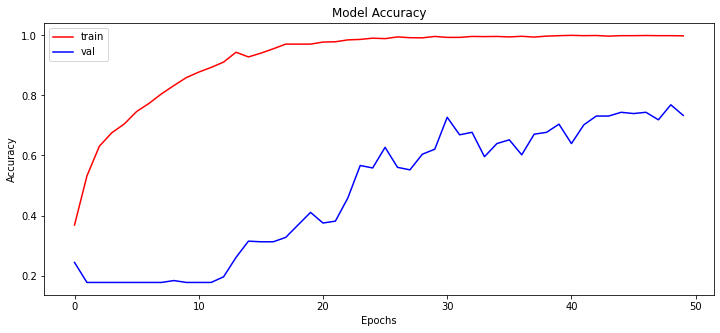

In [18]:
# Ploting the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

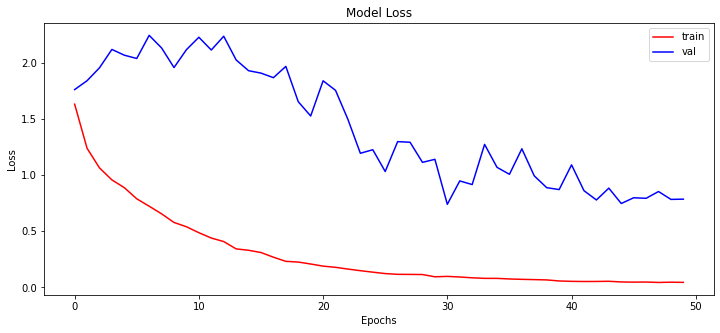

In [19]:
# Ploting the training loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [20]:
scores = model.evaluate(x_test, y_test)
print(f'Tes Accuracy : {scores[1]*100}')

19/19 [==============================] - 9s 507ms/step - loss: 0.7463 - accuracy: 0.7850
Tes Accuracy : 78.50000262260437


In [21]:
# Storing model prediciton 
y_pred = model.predict(x_test)

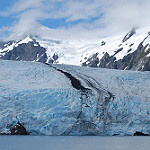

In [22]:
# Plotting image to compare 
img = array_to_img(x_test[1])
img

In [25]:
labels = lb.classes_
print(labels)
print('Orginally : ', labels[np.argmax(y_test[1])])
print('Prediction : ', labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Orginally :  glacier
Prediction :  glacier


Garut, 23 Juli 2022 
Shopi Nurhidayanti 